# Exemplo Índice de Gini

## Modulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import statsmodels.formula.api as sm

## Carregar dados

In [3]:
dados_municipios = pd.read_csv('/home/dados_renda_municipios.csv')

## Selecionar Estados

In [12]:
estado_1 = 'Alagoas'
estado_2 = 'Sergipe'

In [13]:
#filtrando os municípios conforme os estados de Alagoas e Sergipe
dados_estado_1 = dados_municipios[dados_municipios['UF'] == estado_1]
dados_estado_2 = dados_municipios[dados_municipios['UF'] == estado_2]

In [14]:
dados_estado_1

,UF,Municipio,RDPC
1649,Alagoas,ÁGUA BRANCA,213.00
1650,Alagoas,ANADIA,239.53
1651,Alagoas,ARAPIRACA,423.28
1652,Alagoas,ATALAIA,237.33
1653,Alagoas,BARRA DE SANTO ANTÔNIO,247.81
...,...,...,...
1746,Alagoas,TAQUARANA,215.16
1747,Alagoas,TEOTÔNIO VILELA,244.39
1748,Alagoas,TRAIPU,178.79
1749,Alagoas,UNIÃO DOS PALMARES,313.92


In [15]:
dados_estado_1 = dados_estado_1.sort_values('RDPC').reset_index(drop=True)
dados_estado_2 = dados_estado_2.sort_values('RDPC').reset_index(drop=True)

In [16]:
dados_estado_2

,UF,Municipio,RDPC
0,Sergipe,SANTA LUZIA DO ITANHY,194.24
1,Sergipe,PACATUBA,195.47
2,Sergipe,ILHA DAS FLORES,195.64
3,Sergipe,BREJO GRANDE,197.69
4,Sergipe,POÇO REDONDO,202.24
...,...,...,...
70,Sergipe,ESTÂNCIA,395.41
71,Sergipe,PROPRIÁ,400.35
72,Sergipe,ITABAIANA,443.39
73,Sergipe,BARRA DOS COQUEIROS,448.81


## Construir as curvas

- Estado 1

In [20]:
#calcula a soma de todos os valores na coluna 'RDPC' do DataFrame dados_estado_1
total = np.sum(dados_estado_1['RDPC'].values)

In [ ]:
total

25623.979999999996

**Pausa para um "parênteses" na explicação:**

In [ ]:
np.cumsum([1, 2, 3])

array([1, 3, 6])

In [ ]:
np.cumsum([1, 2, 3, 4, 5])

array([ 1,  3,  6, 10, 15])

In [ ]:
np.cumsum([1, 2, 3, 4, 5, 6, 7])

array([ 1,  3,  6, 10, 15, 21, 28])

In [ ]:
np.linspace(0, 1, 5)#início, fim, quantidade

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [18]:
np.linspace(0, 1, 21)#início, fim, quantidade

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

**dados_estado_1['RDPC'].values:** Seleciona a coluna 'RDPC' do DataFrame dados_estado_1, extrai os valores como um array NumPy.

**np.cumsum(...):** Esta função NumPy calcula a soma cumulativa dos valores ao longo do array. Ou seja, para cada posição no array, ela calcula a soma de todos os elementos até aquele ponto.

**np.array([0]):**Aqui, criamos um array NumPy com um único elemento zero. Isso é feito para incluir um ponto de partida na soma cumulativa.

**np.append(...):**Esta função concatena o array NumPy contendo um único zero com o array resultante da soma cumulativa. Assim, o primeiro elemento do array resultante será 0 e os elementos subsequentes serão a soma cumulativa dos valores da coluna 'RDPC' normalizada pelo total.

Finalmente, dividimos a soma cumulativa pelo total para normalizar os valores. Isso é feito para expressar a distribuição de renda em termos de percentagem do total.


In [23]:
x= np.append(np.array([0]), np.cumsum(dados_estado_1['RDPC'].values))


In [27]:
x/total

array([0.        , 0.00591711, 0.01214604, 0.01847644, 0.0253692 ,
       0.03229826, 0.03927571, 0.04632536, 0.05341013, 0.06058427,
       0.06781928, 0.07511206, 0.08243996, 0.08980962, 0.09723353,
       0.10476827, 0.11236779, 0.11997043, 0.12757542, 0.13519289,
       0.1428131 , 0.15049809, 0.15827947, 0.16606671, 0.17385551,
       0.18164821, 0.18957633, 0.1977265 , 0.20596605, 0.21423838,
       0.22255091, 0.2308806 , 0.23927743, 0.24777416, 0.25627596,
       0.26482654, 0.27339352, 0.28201513, 0.29067616, 0.29943085,
       0.3082031 , 0.31701672, 0.32586   , 0.33474074, 0.343625  ,
       0.35257716, 0.36154571, 0.37057514, 0.37961199, 0.38865898,
       0.39774617, 0.40684546, 0.41596661, 0.425142  , 0.43440402,
       0.44368361, 0.4530315 , 0.46238797, 0.47179985, 0.48125506,
       0.49079261, 0.50034811, 0.50992625, 0.51950673, 0.52915394,
       0.53882496, 0.54863023, 0.55843979, 0.56834692, 0.57827277,
       0.58828098, 0.59833562, 0.60847144, 0.61862599, 0.62880

In [21]:
p_renda_estado_1 = np.append(np.array([0]), np.cumsum(dados_estado_1['RDPC'].values)/total   )
p_renda_estado_1

array([0.        , 0.00591711, 0.01214604, 0.01847644, 0.0253692 ,
       0.03229826, 0.03927571, 0.04632536, 0.05341013, 0.06058427,
       0.06781928, 0.07511206, 0.08243996, 0.08980962, 0.09723353,
       0.10476827, 0.11236779, 0.11997043, 0.12757542, 0.13519289,
       0.1428131 , 0.15049809, 0.15827947, 0.16606671, 0.17385551,
       0.18164821, 0.18957633, 0.1977265 , 0.20596605, 0.21423838,
       0.22255091, 0.2308806 , 0.23927743, 0.24777416, 0.25627596,
       0.26482654, 0.27339352, 0.28201513, 0.29067616, 0.29943085,
       0.3082031 , 0.31701672, 0.32586   , 0.33474074, 0.343625  ,
       0.35257716, 0.36154571, 0.37057514, 0.37961199, 0.38865898,
       0.39774617, 0.40684546, 0.41596661, 0.425142  , 0.43440402,
       0.44368361, 0.4530315 , 0.46238797, 0.47179985, 0.48125506,
       0.49079261, 0.50034811, 0.50992625, 0.51950673, 0.52915394,
       0.53882496, 0.54863023, 0.55843979, 0.56834692, 0.57827277,
       0.58828098, 0.59833562, 0.60847144, 0.61862599, 0.62880

In [30]:
#cria um intervalo entre 0% e 100% (0 e 1) do percentual de divisão de renda IDEAL f(x) = x,
#onde x é a populaçao e f(x) a distribuição de renda, ou seja, 1 para 1
#conforme o tamanho da quantidade de linhas que temos na lista p_renda_estado_1
p_familias_estado_1 = np.linspace(0, 1, len(p_renda_estado_1))

p_familias_estado_1

array([0.        , 0.00980392, 0.01960784, 0.02941176, 0.03921569,
       0.04901961, 0.05882353, 0.06862745, 0.07843137, 0.08823529,
       0.09803922, 0.10784314, 0.11764706, 0.12745098, 0.1372549 ,
       0.14705882, 0.15686275, 0.16666667, 0.17647059, 0.18627451,
       0.19607843, 0.20588235, 0.21568627, 0.2254902 , 0.23529412,
       0.24509804, 0.25490196, 0.26470588, 0.2745098 , 0.28431373,
       0.29411765, 0.30392157, 0.31372549, 0.32352941, 0.33333333,
       0.34313725, 0.35294118, 0.3627451 , 0.37254902, 0.38235294,
       0.39215686, 0.40196078, 0.41176471, 0.42156863, 0.43137255,
       0.44117647, 0.45098039, 0.46078431, 0.47058824, 0.48039216,
       0.49019608, 0.5       , 0.50980392, 0.51960784, 0.52941176,
       0.53921569, 0.54901961, 0.55882353, 0.56862745, 0.57843137,
       0.58823529, 0.59803922, 0.60784314, 0.61764706, 0.62745098,
       0.6372549 , 0.64705882, 0.65686275, 0.66666667, 0.67647059,
       0.68627451, 0.69607843, 0.70588235, 0.71568627, 0.72549

In [ ]:
df_estado_1 = pd.DataFrame({'p_familias_estado_1': p_familias_estado_1,
                            'p_renda_estado_1':p_renda_estado_1})

In [ ]:
df_estado_1

,p_familias_estado_1,p_renda_estado_1
0,0.000000,0.000000
1,0.009804,0.005917
2,0.019608,0.012146
3,0.029412,0.018476
4,0.039216,0.025369
...,...,...
98,0.960784,0.919215
99,0.970588,0.935715
100,0.980392,0.952233
101,0.990196,0.969070


- Estado 2

In [ ]:
total = np.sum(dados_estado_2['RDPC'].values)

In [ ]:
p_renda_estado_2 = np.append(np.array([0]), np.cumsum(dados_estado_2['RDPC'].values/total))

In [ ]:
p_familias_estado_2 = np.linspace(0, 1, len(p_renda_estado_2))

In [ ]:
df_estado_2 = pd.DataFrame({'p_familias_estado_2': p_familias_estado_2,
                            'p_renda_estado_2':p_renda_estado_2})

## Curvas Brutas

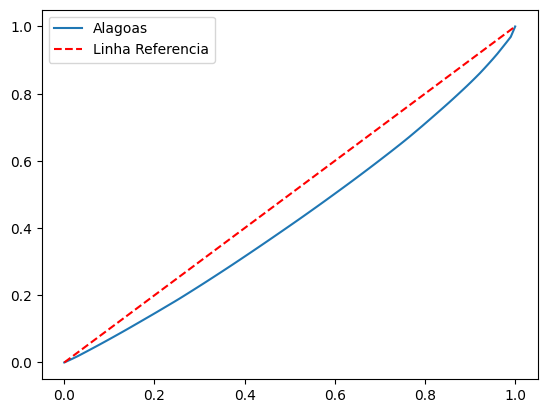

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_estado_1'], label=estado_1)
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

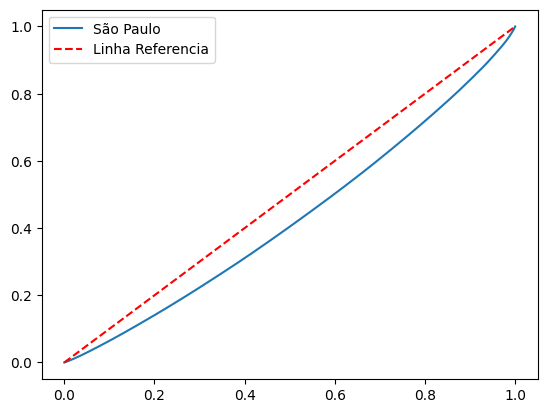

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_2['p_familias_estado_2'], df_estado_2['p_renda_estado_2'], label=estado_2)
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

## Ajustar a curva e obter a integral

- Curva estado 1

In [ ]:
#criando um modelo que se ajuste aos dados (descobrir a função f(x) que modela a curva)
modelo_1 = sm.ols(formula= 'p_renda_estado_1 ~ p_familias_estado_1 + np.power(p_familias_estado_1, 2)',
                  data= df_estado_1).fit() #você entenderão como fazer isso em uma disciplina de Machine Learning

In [ ]:
#modelo_1.summary() #visualiza os dados gerados no modelo (não vamos aprofundar nisso ainda)

In [ ]:
df_estado_1['p_renda_pred'] = modelo_1.predict(df_estado_1)

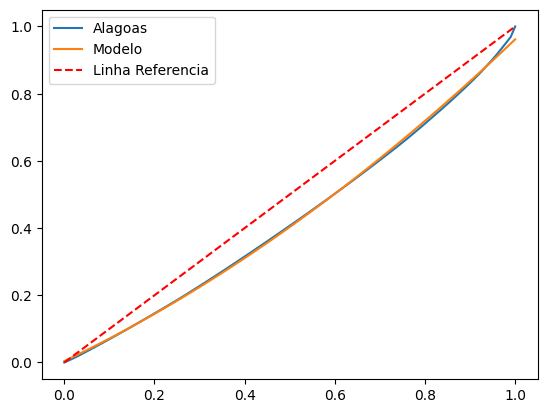

In [ ]:
#criando um gráfico com o modelo ideal (linha pontilhada vermelha)
#modelo real (linha azul), que são os dados aos quais não temos uma equação
#modelo calculado (linha laranja) que é uma equação descoberta a partir dos dados
fig, ax = plt.subplots()
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_estado_1'], label=estado_1) #dados do dataset
ax.plot(df_estado_1['p_familias_estado_1'], df_estado_1['p_renda_pred'], label='Modelo') #modelo descoberto pelo computador
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia') #modelo ideal f(x) = x, ou seja, não há desiguadade
ax.legend()

- Obter integral

In [ ]:
modelo_1.params

Intercept                           0.004197
p_familias_estado_1                 0.638235
np.power(p_familias_estado_1, 2)    0.319308
dtype: float64

Observe que o modelo criado resultado nos seguintes valores:


*   **0.004197** (número que representa uma constante da equação)
*   **p_familias_estado_1  0.638235** (equivalente à 0.638235*x)
*   **np.power(p_familias_estado_1, 2) 0.319308** (equivalente à 0.319308*x²)

Portanto o modelo ficou:



*   0.319308x² + 0.638235x + 0.00419
*   onde x = p_familias_estado_1













In [ ]:
#criando a variável x
p_familias = sp.Symbol('PercFamilias')
p_familias

PercFamilias

Vamos calcular a equação de Gini. Lembrem-se:



*   **x =** p_familias_estado_1 (percen. família de Alagoas)
*  **f(x) =** x (modelo ideal de distribuição de renda
*   **g(x) =** 0.319308x² + 0.638235x + 0.00419 (modelo que descreve a distribuição de renda de Alagoas
*   **gini =** Área do gráfico | f(x) - g(x) |
*   **gini =** 2*( f(x) - g(x) )dx

Portanto:

*  gini =  2*( x -(0.319308x² + 0.638235x + 0.00419) )dx












In [ ]:
#criando a equação que modela o sistema
# x -(0.319308x² + 0.638235x + 0.00419)
f_estado_1 = p_familias - ( 0.3193*p_familias**2 + 0.6382*p_familias + 0.0042)
f_estado_1

-0.3193*PercFamilias**2 + 0.3618*PercFamilias - 0.0042

In [ ]:
#integrando a equação de forma genérica (sem inserir os valores)
# calculando: ( x -(0.319308x² + 0.638235x + 0.00419) )dx
F_estado_1 = sp.integrate(f_estado_1)
F_estado_1

-0.106433333333333*PercFamilias**3 + 0.1809*PercFamilias**2 - 0.0042*PercFamilias

In [ ]:
# transformar numa função em que operações podem ser realizadas
F_estado_1 = sp.lambdify(p_familias, F_estado_1)

- Obter o gini

In [ ]:
#calcular o valor ideal menos o valor previsto pela equação e multiplicando por 2
#conforme a fórmula de Gini
gini_estado1 = 2 * ( F_estado_1(1) - F_estado_1(0) )
gini_estado1

0.140533333333334

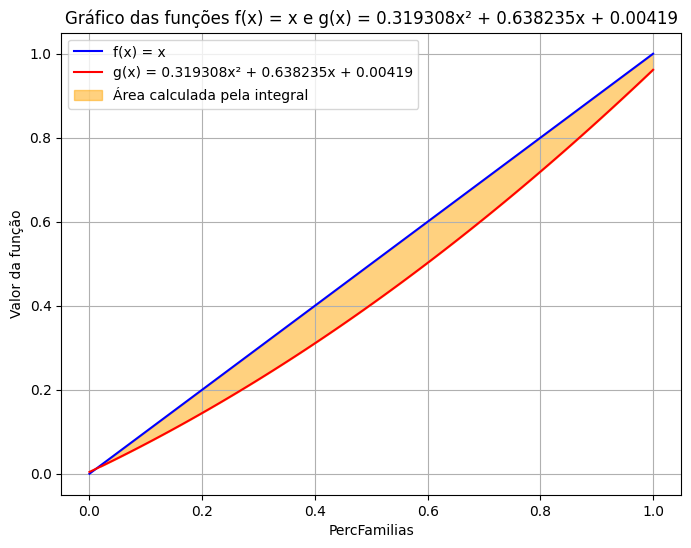

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os valores de x (p_familias)
x_values = np.linspace(0, 1, 100)

# Definindo as funções f(x) = x e g(x) = 0.319308x² + 0.638235x + 0.00419
f_x = x_values
g_x = 0.319308 * x_values**2 + 0.638235 * x_values + 0.00419

# Criando o gráfico
plt.figure(figsize=(8, 6))

# Plotando as funções
plt.plot(x_values, f_x, label='f(x) = x', color='blue')
plt.plot(x_values, g_x, label='g(x) = 0.319308x² + 0.638235x + 0.00419', color='red')

# Preenchendo a área entre as curvas
plt.fill_between(x_values, f_x, g_x, color='orange', alpha=0.5, label='Área calculada pela integral', where=(g_x <= f_x))

# Configurações adicionais do gráfico
plt.xlabel('PercFamilias')
plt.ylabel('Valor da função')
plt.title('Gráfico das funções f(x) = x e g(x) = 0.319308x² + 0.638235x + 0.00419')
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


Um índice de Gini de 0.14 sugere uma distribuição de renda relativamente igualitária em comparação com uma distribuição perfeitamente igualitária, onde o índice de Gini seria 0.

Em uma escala de 0 a 1, onde 0 representa perfeita igualdade (cada indivíduo tem a mesma renda) e 1 representa perfeita desigualdade (uma pessoa tem toda a renda), um valor de 0.14 indica que a desigualdade na distribuição de renda é relativamente baixa. Isso significa que a maior parte da população tem uma renda próxima à média, e há menos disparidade entre os níveis de renda dos indivíduos.

Em termos práticos, uma distribuição de renda com um índice de Gini de 0.14 sugere que há menos diferença entre os rendimentos dos indivíduos, o que pode indicar um maior acesso a oportunidades econômicas e uma distribuição mais equitativa de recursos. No entanto, outras medidas e fatores também devem ser considerados para uma compreensão completa da distribuição de renda em uma determinada população.

- Estado 2

In [ ]:
modelo_2 = sm.ols(formula= 'p_renda_estado_2 ~ p_familias_estado_2 + np.power(p_familias_estado_2, 2)',
                  data= df_estado_2).fit()

In [ ]:
#modelo_2.summary()

In [ ]:
df_estado_2['p_renda_pred'] = modelo_2.predict(df_estado_2)

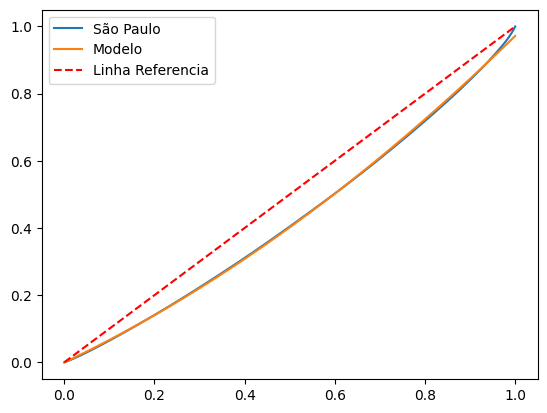

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_estado_2['p_familias_estado_2'], df_estado_2['p_renda_estado_2'], label=estado_2)
ax.plot(df_estado_2['p_familias_estado_2'], df_estado_2['p_renda_pred'], label='Modelo')
ax.plot([0, 1], [0, 1], 'r--', label='Linha Referencia')
ax.legend()

- Obter integral

In [ ]:
modelo_2.params

Intercept                          -0.000557
p_familias_estado_2                 0.637063
np.power(p_familias_estado_2, 2)    0.335257
dtype: float64

In [ ]:
p_familias = sp.Symbol('PercFamilias')

In [ ]:
f_estado_2 = p_familias - 0.0010 - 0.6506*p_familias - 0.3113*p_familias**2

In [ ]:
F_estado_2 = sp.integrate(f_estado_2)
F_estado_2

-0.103766666666667*PercFamilias**3 + 0.1747*PercFamilias**2 - 0.001*PercFamilias

In [ ]:
# transformar numa função em que operações podem ser realizadas
F_estado_2 = sp.lambdify(p_familias, F_estado_2)

- Obter o gini

In [ ]:
gini_estado2 = 2 * ( F_estado_2(1) - F_estado_2(0) )
gini_estado2

0.13986666666666597

## Uso de função pronta

Implentação encontrada em: https://github.com/oliviaguest/gini/blob/master/gini.py

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
gini(dados_estado_1['RDPC'].values), gini_estado1

(0.14082322758568558, 0.140533333333334)

In [ ]:
gini(dados_estado_2['RDPC'].values), gini_estado2

(0.14058951293827596, 0.13986666666666597)